# Assistments 22 experiments data set

* There are 22 unique problem_set
* 8205 unique Uner ID
* 123 unique School_id

Description of columns  
http://www.assistmentstestbed.org/the-data/ali-doc-request/interpreting-your-data-v-1-0  

1. "complete" indicates whether the student did complete the skill builder (1) or not (0)  

2. "problem_count" is the number of problems the student has attempted. This is also known as Mastery Speed  

3. "log(count)" is the logarithm based ten of "problem_count" if the students completed the assignments, "N/A" otherwise.  

The two variables used for measuring student
performance were whether or not the student
completed the assignment and the mastery speed for
those students who were able to complete the
assignment. The number of problems it takes a
student to complete a skill builder is also called mastery
speed as defined in [9]. We believe these two variables
are important measures, where mastery speed
measures student learning and completion rate
measures student persistence. There were a few cases
where a small number of students did a large number
of problems, which added skew to the distribution of
mastery speed. A log transform was used so that these
few students did not have large impact on the means
for mastery speed.

Column descriptions

Condition is shown as either ‘C’, or ‘E’ to indicate if the  student was part of the control or experimental condition.  

1. Prior Correct Percent - The average correctness for  a given student among all prior non-individualized  problems that the student had attempted and  answered. This variable is continuous [0, 1]. 
2. Prior Correct Percent Valid - A variable to identify  if the prior correct percent value was missing. In  
order to run the random forest algorithm, there  cannot be any missing values. Therefore all places  where there was no prior correctness were  assigned a value of zero. This variable indicates  where there really was no prior correctness value,  which can be factored into the trees of the forest. 
3. Guessed Gender - The guessed gender of the  student based on a list of common male and  female names. This variable can take on three  values (male, female, and unknown) [11]. 
4. State ID - A unique ID to identify the state the  student was in when he or she participated in the  experiment assignment. 
5. Prior Completion Percent - The percentage of Skill  Builder assignments completed by the student  prior to the experiment assignment within the  same class. This variable is continuous [0, 1]. 
6. Prior Completion Percent Valid - A variable to  indicate if the prior completion percent value was  missing. 
7. Z Scored Mastery Speed - The prior mastery speed  for a given student within the same class that the  student was in for the experiment assignment z scored with the other students in the class. 
8. Z Scored Mastery Speed Valid - A variable to  indicate if the Z scored Master Speed value was  missing. 
9. Prior Homework Completion Percent - The  percentage of Skill Builder homework assignments  done prior to the experiment assignment for a  given student within the same class. An  assignment is considered a homework assignment  if more than 80% of students in the class started  the assignment outside of 30 minutes from overall  median start time. This definition implies that  students working on classwork will all start the  assignment roughly at the same time (within the  class), where students working on homework will  start at different times. 
10. Prior Homework Completion Percent Valid - A variable to indicate if the prior homework  completion percent value was missing. 
11. Z Scored HW Mastery Speed - The same as Z  scored Mastery Speed but only including  homework assignments. 
12. Z Scored HW Mastery Speed Valid - A variable to  indicate if the Z Scored HW Mastery Speed value  was missing. 

Outcome Measures  
1. Complete - Whether or not the student completed  the assignment 
2. Log Problem Count - The logarithm (base ten) of  the student’s mastery speed on the assignment for  students who have completed the assignment.


Dataset  
https://sites.google.com/site/las2016data/data  

Neil's publications  
https://www.neilheffernan.net/publications  
https://sites.google.com/site/assistmentsstudies/useourdata  

Papers, code and data  
https://sites.google.com/site/las2016data/data  

Papers on Assistments TestBed  
http://www.assistmentstestbed.org/the-data/ali-doc-request/interpreting-your-data-v-1-0  

Questions
* Why are there people with Birthyear from 1970?  There's a large distribution.
* Can I get a list of the actual questions?
* Would be nice to have a date and time for each data point
* The paper (https://drive.google.com/file/d/14yX6jZuQiHJOS4rcYxKmJvvvGmx7AQEB/view) says these are 6-8 graders.  Why do I see other grades?

In [172]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [257]:
study_data = pd.read_excel("./ThisOne.xlsx")

# remove extra quotes
for feature in ["Birthyear", "Class Grade", "Guessed Gender"]:
    study_data[feature] = study_data[feature].apply(lambda x: x.replace('"', ''))
    
# map high school freshman, sophomore, junior, senior to grade numbers
study_data["Class Grade"] = study_data["Class Grade"].replace(
    {"Freshmen": "9", "Sophomore": "10", "Junior": "11", "Senior": "12", "N/A": None}
).astype(float)

print(len(list(study_data.columns)))

list(study_data.columns)

33


['problem_set',
 'problem_set_name',
 'User ID',
 'Condition',
 'ExperiencedCondition',
 'Could See Video',
 'Prior Problem Count',
 'Prior Correct Count',
 'Prior Percent Correct',
 'Class ID',
 'Class Section ID',
 'Class Grade',
 'Teacher ID',
 'Guessed Gender',
 'Birthyear',
 'school_id',
 'District ID',
 'State ID',
 'Prior Assignments Assigned',
 'Prior Assignment Count',
 'Prior Completion Count',
 'Prior Percent Completion',
 'Prior Class Percent Completion',
 'Z-Scored Mastery Speed',
 'Prior Homework Assigned',
 'Prior Homework Count',
 'Prior Homework Completion Count',
 'Prior Homework Percent Completion',
 'Prior Class Homework Percent Completion',
 'Z-Scored HW Mastery Speed',
 'complete',
 'ProblemCount',
 'log(count)']

In [255]:
len(study_data["User ID"].unique())

8205

In [259]:
len(study_data)

14947

In [258]:
# Look at distribution of Birthyear
feature = "Birthyear"
#feature = "Class Grade"
study_data[feature].value_counts(dropna=False)

2001    2596
2000    2239
1998    2001
1999    1905
1997    1733
2002    1520
2003    1046
1996     941
1995     277
2004     254
2013     159
2014      82
2012      43
2015      30
          19
1994      18
1990      15
1914      14
1993       6
1927       6
1991       6
2011       5
2007       4
1962       4
1987       3
2009       3
2010       3
1913       3
1985       1
1969       1
1986       1
2005       1
1981       1
1984       1
2006       1
1922       1
2008       1
1915       1
1988       1
1970       1
Name: Birthyear, dtype: int64

In [53]:
study_data.describe()

,problem_set,User ID,Could See Video,Prior Problem Count,Prior Correct Count,Prior Percent Correct,Class ID,Class Section ID,Teacher ID,school_id,...,Z-Scored Mastery Speed,Prior Homework Assigned,Prior Homework Count,Prior Homework Completion Count,Prior Homework Percent Completion,Prior Class Homework Percent Completion,Z-Scored HW Mastery Speed,complete,ProblemCount,log(count)
count,14947.000000,14947.000000,5314.000000,14625.000000,14625.000000,14625.000000,14947.000000,13265.000000,14947.000000,14947.000000,...,11842.000000,9703.000000,8669.000000,8669.000000,8669.000000,8952.000000,8669.000000,14947.000000,14947.000000,12260.000000
mean,266717.592025,250538.210812,0.785472,756.657641,522.971556,0.698106,29163.498562,56321.035205,166453.744497,6960.605540,...,-0.001441,28.670617,23.223671,21.557504,0.924417,0.924112,0.003447,0.820231,6.542985,0.724556
std,35810.777415,51802.426443,0.410533,825.337377,573.038732,0.120103,5226.346540,7933.056416,80777.659861,2729.406962,...,0.435662,30.557918,24.510913,22.561567,0.157464,0.089877,0.469787,0.384007,5.856159,0.282146
min,226210.000000,75064.000000,0.000000,1.000000,0.000000,0.000000,16772.000000,42815.000000,10646.000000,1.000000,...,-2.971125,1.000000,1.000000,0.000000,0.000000,0.166667,-2.744107,0.000000,0.000000,0.301030
25%,243393.000000,227558.000000,1.000000,162.000000,110.000000,0.635997,26965.000000,49813.000000,94661.000000,5444.000000,...,-0.242246,7.000000,5.000000,5.000000,0.911111,0.897143,-0.273219,1.000000,3.000000,0.477121
50%,256017.000000,251277.000000,1.000000,410.000000,285.000000,0.705882,30837.000000,56398.000000,157570.000000,6504.000000,...,-0.032483,21.000000,15.000000,13.000000,1.000000,0.943820,-0.047766,1.000000,5.000000,0.698970
75%,293151.000000,285884.000000,1.000000,1138.000000,803.000000,0.773585,31794.000000,62867.000000,216515.000000,7968.000000,...,0.187181,43.000000,34.000000,32.000000,1.000000,0.981308,0.209235,1.000000,8.000000,0.954243
max,377938.000000,352112.000000,1.000000,5775.000000,4289.000000,1.000000,38561.000000,73519.000000,361832.000000,14400.000000,...,5.172028,151.000000,149.000000,149.000000,1.000000,1.000000,5.172028,1.000000,85.000000,1.924279


In [228]:
study_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14947 entries, 0 to 14946
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   problem_set                              14947 non-null  int64  
 1   problem_set_name                         14947 non-null  object 
 2   User ID                                  14947 non-null  int64  
 3   Condition                                14947 non-null  object 
 4   ExperiencedCondition                     14947 non-null  bool   
 5   Could See Video                          5314 non-null   float64
 6   Prior Problem Count                      14625 non-null  float64
 7   Prior Correct Count                      14625 non-null  float64
 8   Prior Percent Correct                    14625 non-null  float64
 9   Class ID                                 14947 non-null  int64  
 10  Class Section ID                         13265

In [54]:
# How much variation is there in each feature
for col in study_data.columns:
    print(f"{col:40} {len(study_data[col].unique())}")

problem_set                              22
problem_set_name                         22
User ID                                  8205
Condition                                2
ExperiencedCondition                     2
Could See Video                          3
Prior Problem Count                      2790
Prior Correct Count                      2105
Prior Percent Correct                    10525
Class ID                                 374
Class Section ID                         624
Class Grade                              13
Teacher ID                               200
Guessed Gender                           3
Birthyear                                40
school_id                                123
District ID                              105
State ID                                 19
Prior Assignments Assigned               177
Prior Assignment Count                   176
Prior Completion Count                   172
Prior Percent Completion                 804
Prior Class Percen

In [241]:
print(study_data["Condition"].value_counts(dropna=False), "\n")
print(study_data["ExperiencedCondition"].value_counts(dropna=False), "\n")
print(study_data["Could See Video"].value_counts(dropna=False))

C    7512
E    7435
Name: Condition, dtype: int64 

True     10627
False     4320
Name: ExperiencedCondition, dtype: int64 

NaN    9633
1.0    4174
0.0    1140
Name: Could See Video, dtype: int64


In [263]:
10627/(10627+4320)

0.710978791730782

In [262]:
study_data["State ID"].value_counts()

22    8346
31    3537
30     962
20     898
36     459
5      158
23     115
44     112
48     106
33      73
34      70
7       57
39      20
53      12
9       11
26       4
15       3
10       3
11       1
Name: State ID, dtype: int64

In [260]:
# Which problems had video?
print(study_data.loc[study_data["Could See Video"] == 1., "problem_set"].value_counts(), "\n")
print(study_data.loc[study_data["Could See Video"] == 0., "problem_set"].value_counts(), "\n")
print(study_data.loc[study_data["Could See Video"].isna(), "problem_set"].value_counts(), "\n")
print(study_data.loc[study_data["Could See Video"].notna(), "problem_set"].value_counts())

293151    821
263015    596
263115    550
263052    523
259379    403
256017    352
263109    337
250476    310
256027    282
Name: problem_set, dtype: int64 

293151    438
263115    204
263015    108
259379     94
250476     92
263109     91
256017     60
256027     53
Name: problem_set, dtype: int64 

303899    1917
243393    1797
226210    1185
237447     692
241622     627
246647     538
255116     534
246627     514
246482     457
377658     429
377938     426
241501     381
263057     136
Name: problem_set, dtype: int64 

293151    1259
263115     754
263015     704
263052     523
259379     497
263109     428
256017     412
250476     402
256027     335
Name: problem_set, dtype: int64


In [56]:
# Look at User ID with birth years before 1980
study_data[study_data["Birthyear"].apply(lambda x: int(x) < 1980 if len(x)> 0 else False)]

,problem_set,problem_set_name,User ID,Condition,ExperiencedCondition,Could See Video,Prior Problem Count,Prior Correct Count,Prior Percent Correct,Class ID,...,Z-Scored Mastery Speed,Prior Homework Assigned,Prior Homework Count,Prior Homework Completion Count,Prior Homework Percent Completion,Prior Class Homework Percent Completion,Z-Scored HW Mastery Speed,complete,ProblemCount,log(count)
377,226210,Multiplying Mixed Numbers 5.NF.B.4a EX,255427,C,False,NaN,NaN,NaN,NaN,29103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN
631,226210,Multiplying Mixed Numbers 5.NF.B.4a EX,282393,C,True,NaN,61.0,52.0,0.852459,31189,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN
1042,226210,Multiplying Mixed Numbers 5.NF.B.4a EX,303910,C,False,NaN,NaN,NaN,NaN,33460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN
1836,237447,Understanding Vocabulary About Circles G-C.A.2 EX,291660,C,True,NaN,235.0,190.0,0.808511,32278,...,0.197510,38.0,34.0,34.0,1.000000,0.957958,0.102045,1,5,0.698970
1923,241501,Equivalent Expressions 6.EE.B.4 EX,226940,C,True,NaN,3482.0,888.0,0.255026,29485,...,0.253796,7.0,7.0,5.0,0.714286,0.629032,0.588484,0,19,NaN
2950,243393,Dividing Mixed Numbers 6.NS.A.1-Ex,226940,E,True,NaN,2901.0,675.0,0.232678,29485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,85,NaN
3164,243393,Dividing Mixed Numbers 6.NS.A.1-Ex,237441,C,True,NaN,2134.0,1081.0,0.506560,31036,...,0.344249,NaN,NaN,NaN,NaN,NaN,NaN,1,6,0.778151
3756,243393,Dividing Mixed Numbers 6.NS.A.1-Ex,282393,C,True,NaN,64.0,54.0,0.843750,31189,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN
5059,246482,Finding Expected Value SS.MD.B.5 EX,268839,C,True,NaN,NaN,NaN,NaN,30163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN
5341,246627,Conditional Probability SS-CP.A.3 EX,209811,E,True,NaN,552.0,375.0,0.679348,26330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5,0.698970


In [57]:
study_data.loc[0]

problem_set                                                                226210
problem_set_name                           Multiplying Mixed Numbers 5.NF.B.4a EX
User ID                                                                    172777
Condition                                                                       E
ExperiencedCondition                                                        False
Could See Video                                                               NaN
Prior Problem Count                                                         708.0
Prior Correct Count                                                         523.0
Prior Percent Correct                                                    0.738701
Class ID                                                                    31189
Class Section ID                                                              NaN
Class Grade                                                                     8
Teacher ID      

In [17]:
for id, group in study_data.groupby("User ID"):
    print(id)
    print(group)
    break

75064
      problem_set                          problem_set_name  User ID  \
6191       250476  Basic Logarithm Manipulation F-BF.B.5 EX    75064   
7874       259379     Finding Inverse Functions F-BF.B.4 EX    75064   
8371       263015     Composition of Functions F-BF.A.1c EX    75064   

     Condition  ExperiencedCondition  Could See Video  Prior Problem Count  \
6191         E                 False              0.0                422.0   
7874         C                  True              1.0                388.0   
8371         E                 False              1.0                360.0   

      Prior Correct Count  Prior Percent Correct  Class ID  ...  \
6191                306.0               0.725118     26402  ...   
7874                286.0               0.737113     26402  ...   
8371                269.0               0.747222     26402  ...   

      Z-Scored Mastery Speed Prior Homework Assigned  Prior Homework Count  \
6191                0.123971                 

In [20]:
groups = study_data.groupby("User ID")
groups.get_group(75064)

,problem_set,problem_set_name,User ID,Condition,ExperiencedCondition,Could See Video,Prior Problem Count,Prior Correct Count,Prior Percent Correct,Class ID,...,Z-Scored Mastery Speed,Prior Homework Assigned,Prior Homework Count,Prior Homework Completion Count,Prior Homework Percent Completion,Prior Class Homework Percent Completion,Z-Scored HW Mastery Speed,complete,ProblemCount,log(count)
6191,250476,Basic Logarithm Manipulation F-BF.B.5 EX,75064,E,False,0.0,422.0,306.0,0.725118,26402,...,0.123971,19.0,19.0,18.0,0.947368,0.928082,0.114843,1,3,0.477121
7874,259379,Finding Inverse Functions F-BF.B.4 EX,75064,C,True,1.0,388.0,286.0,0.737113,26402,...,0.319789,11.0,11.0,11.0,1.000000,0.928144,0.057693,0,16,NaN
8371,263015,Composition of Functions F-BF.A.1c EX,75064,E,False,1.0,360.0,269.0,0.747222,26402,...,0.308835,10.0,7.0,7.0,1.000000,0.950000,-0.097204,1,3,0.477121


In [58]:
feature = "problem_set"
groups.count()[feature].describe()

count    8205.000000
mean        1.821694
std         1.740340
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        13.000000
Name: problem_set, dtype: float64

In [25]:
len(study_data)

14947

In [26]:
len(study_data["User ID"].unique())

8205

In [129]:
list(study_data["problem_set_name"].unique())

['Multiplying Mixed Numbers 5.NF.B.4a EX',
 'Understanding Vocabulary About Circles G-C.A.2 EX',
 'Equivalent Expressions 6.EE.B.4 EX',
 'Writing Inequalities from Situations 6.EE.B8 EX',
 'Dividing Mixed Numbers 6.NS.A.1-Ex',
 'Finding Expected Value SS.MD.B.5 EX',
 'Conditional Probability SS-CP.A.3 EX',
 'Permutations and Combinations SS-CP.B.2 EX',
 'Basic Logarithm Manipulation F-BF.B.5 EX',
 'Properties of Exponents 8.EE.A.1 EX',
 'Intermediate Logarithm Manipulation F-BF.B.5 EX',
 'Solving ab^ct = d F-LE.A.4a EX',
 'Finding Inverse Functions F-BF.B.4 EX',
 'Composition of Functions F-BF.A.1c EX',
 'Sequences F-BF.A.2 EX',
 'Comparing Values After Multiplying by Fractions 5.NF.B.5a EX',
 'Converting Radians -Degrees F-TF.A.1 EX',
 'Trigonometric Ratios G-SRT.C.8 EX',
 'Pythagorean Theorem - Finding the Hypotenuse Side 8.G.B.7 EX',
 'Solving 1-Step Equations 7.EE.B.4a EX',
 'Rotations 8.G.A.3 EX',
 'Reflections 8.G.A.3 EX']

## Correlations

In [123]:
corr_features = [
     'problem_set',
#     'problem_set_name',
     'User ID',
#     'Condition',
#     'ExperiencedCondition',
     'Could See Video',
     'Prior Problem Count',
     'Prior Correct Count',
     'Prior Percent Correct',
     'Class ID',
     'Class Section ID',
     'Class Grade',
     'Teacher ID',
#     'Guessed Gender',
     'Birthyear',
     'school_id',
     'District ID',
     'State ID',
#     'Prior Assignments Assigned',
     'Prior Assignment Count',
     'Prior Completion Count',
     'Prior Percent Completion',
     'Prior Class Percent Completion',
     'Z-Scored Mastery Speed',
#     'Prior Homework Assigned',
     'Prior Homework Count',
     'Prior Homework Completion Count',
     'Prior Homework Percent Completion',
     'Prior Class Homework Percent Completion',
     'Z-Scored HW Mastery Speed',
     'complete',
     'ProblemCount',
#     'log(count)'
]

In [124]:
corrMatrix = study_data[corr_features].corr()
corrMatrix

,problem_set,User ID,Could See Video,Prior Problem Count,Prior Correct Count,Prior Percent Correct,Class ID,Class Section ID,Class Grade,Teacher ID,...,Prior Percent Completion,Prior Class Percent Completion,Z-Scored Mastery Speed,Prior Homework Count,Prior Homework Completion Count,Prior Homework Percent Completion,Prior Class Homework Percent Completion,Z-Scored HW Mastery Speed,complete,ProblemCount
problem_set,1.000000,0.170773,-0.169202,-0.095528,-0.091345,-0.020767,0.198086,0.077802,0.034304,0.205852,...,0.041725,0.072169,-0.005935,0.012800,0.020536,0.041378,0.041304,-0.008476,0.147810,-0.078952
User ID,0.170773,1.000000,-0.145322,-0.667716,-0.654847,0.134185,0.483279,0.371662,-0.369749,0.436899,...,0.043524,0.094763,0.022676,-0.150102,-0.129667,0.084321,0.165619,0.020548,0.036767,0.048159
Could See Video,-0.169202,-0.145322,1.000000,0.115025,0.124053,0.051588,-0.112617,-0.020538,0.052937,-0.035617,...,0.102162,0.132966,-0.015989,-0.032868,-0.022618,0.089114,0.033865,-0.035260,0.037922,-0.040463
Prior Problem Count,-0.095528,-0.667716,0.115025,1.000000,0.986457,-0.053026,-0.363820,0.111253,0.408204,-0.352073,...,0.035576,0.026527,0.023552,0.071493,0.057957,-0.031926,-0.067457,0.022934,0.038949,-0.057528
Prior Correct Count,-0.091345,-0.654847,0.124053,0.986457,1.000000,0.034606,-0.345432,0.118627,0.403982,-0.340975,...,0.066665,0.047053,-0.000360,0.070414,0.064008,0.000966,-0.048737,-0.005477,0.060629,-0.073392
Prior Percent Correct,-0.020767,0.134185,0.051588,-0.053026,0.034606,1.000000,0.116177,0.139932,-0.023568,0.069003,...,0.351419,0.287258,-0.262473,0.039706,0.079002,0.283851,0.204528,-0.266644,0.183168,-0.141926
Class ID,0.198086,0.483279,-0.112617,-0.363820,-0.345432,0.116177,1.000000,0.232720,-0.377333,0.411165,...,0.098679,0.136452,0.007374,-0.054952,-0.032335,0.168279,0.206941,0.003268,0.031129,0.067679
Class Section ID,0.077802,0.371662,-0.020538,0.111253,0.118627,0.139932,0.232720,1.000000,0.167518,0.161278,...,0.078960,0.127095,0.006076,-0.198265,-0.186074,0.071659,0.105480,-0.001018,0.108985,-0.047870
Class Grade,0.034304,-0.369749,0.052937,0.408204,0.403982,-0.023568,-0.377333,0.167518,1.000000,-0.122984,...,0.008745,0.013582,-0.005518,0.239189,0.221310,-0.067007,-0.044983,-0.018060,0.053876,-0.108999
Teacher ID,0.205852,0.436899,-0.035617,-0.352073,-0.340975,0.069003,0.411165,0.161278,-0.122984,1.000000,...,-0.004425,-0.023705,0.007807,0.058913,0.077693,0.060135,0.059616,0.003356,0.005858,0.073252


In [127]:
# which features have high correlation with other features
CORR_THRESHOLD = 0.4
have_corr = []
for col in corrMatrix.columns:
    for row in corrMatrix.index:
        corr_value = corrMatrix.loc[row, col]
        if (corr_value > CORR_THRESHOLD) & (row != col) & ((col, row) not in have_corr):
            have_corr.append((row, col))
            print(f"{corr_value:3.2f}  {row:40} {col}")

0.48  Class ID                                 User ID
0.44  Teacher ID                               User ID
0.99  Prior Correct Count                      Prior Problem Count
0.41  Class Grade                              Prior Problem Count
0.40  Class Grade                              Prior Correct Count
0.41  Teacher ID                               Class ID
0.54  school_id                                Teacher ID
0.43  State ID                                 District ID
0.99  Prior Completion Count                   Prior Assignment Count
0.91  Prior Homework Count                     Prior Assignment Count
0.90  Prior Homework Completion Count          Prior Assignment Count
0.88  Prior Homework Count                     Prior Completion Count
0.90  Prior Homework Completion Count          Prior Completion Count
0.57  Prior Class Percent Completion           Prior Percent Completion
0.85  Prior Homework Percent Completion        Prior Percent Completion
0.72  Prior Class Home

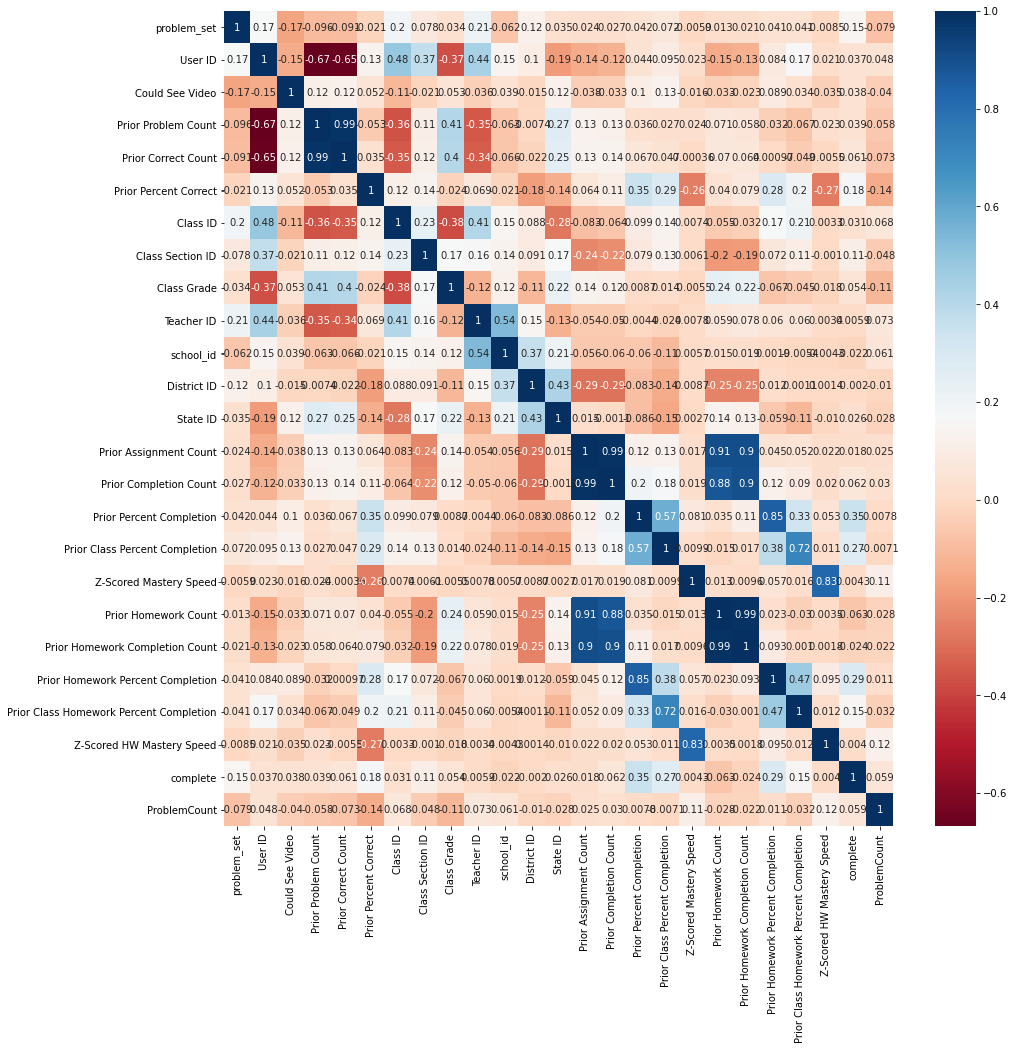

In [126]:
plt.figure(figsize=(15, 15))
sns.heatmap(corrMatrix, annot=True, cmap="RdBu")
plt.show()

In [148]:
study_data

,problem_set,problem_set_name,User ID,Condition,ExperiencedCondition,Could See Video,Prior Problem Count,Prior Correct Count,Prior Percent Correct,Class ID,...,Z-Scored Mastery Speed,Prior Homework Assigned,Prior Homework Count,Prior Homework Completion Count,Prior Homework Percent Completion,Prior Class Homework Percent Completion,Z-Scored HW Mastery Speed,complete,ProblemCount,log(count)
0,226210,Multiplying Mixed Numbers 5.NF.B.4a EX,172777,E,False,NaN,708.0,523.0,0.738701,31189,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0.477121
1,226210,Multiplying Mixed Numbers 5.NF.B.4a EX,175658,E,True,NaN,1486.0,1150.0,0.773890,30642,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0,19,NaN
2,226210,Multiplying Mixed Numbers 5.NF.B.4a EX,175669,E,True,NaN,1484.0,969.0,0.652965,29270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8,0.903090
3,226210,Multiplying Mixed Numbers 5.NF.B.4a EX,176151,E,True,NaN,1534.0,1099.0,0.716428,29270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,7,0.845098
4,226210,Multiplying Mixed Numbers 5.NF.B.4a EX,176165,E,True,NaN,1531.0,865.0,0.564990,29270,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14942,377938,Reflections 8.G.A.3 EX,332701,C,False,NaN,78.0,67.0,0.858974,35385,...,-0.436799,36.0,11.0,11.0,1.0,0.984648,-0.436799,1,3,0.477121
14943,377938,Reflections 8.G.A.3 EX,333336,C,True,NaN,94.0,76.0,0.808511,35385,...,0.192691,36.0,17.0,17.0,1.0,0.984648,0.192691,1,4,0.602060
14944,377938,Reflections 8.G.A.3 EX,333569,C,True,NaN,88.0,68.0,0.772727,35385,...,0.397174,36.0,12.0,12.0,1.0,0.984648,0.397174,1,4,0.602060
14945,377938,Reflections 8.G.A.3 EX,338608,E,True,NaN,273.0,220.0,0.805861,35385,...,-0.491379,36.0,12.0,12.0,1.0,0.984648,-0.491379,1,10,1.000000


## Clustering

Normalize with sklearn.preprocessing.StandardScaler  

Interesting articles  
https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad

https://machinelearningmastery.com/clustering-algorithms-with-python/  

TODO  
Need to look into standard scalar scaling  
https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

In [222]:
# From the Assistments dataset
feature_1 = "Prior Problem Count"
feature_2 = "Prior Percent Correct"
A_X = study_data[[feature_1, feature_2]]
A_X[feature_1] = A_X[feature_1]/5000.
A_X = A_X.dropna()

# Take a random sample to make a smaller dataset
#A_X = A_X.sample(n=500)
A_X

<ipython-input-222-976c22bd0ec4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A_X[feature_1] = A_X[feature_1]/5000.


,Prior Problem Count,Prior Percent Correct
0,0.1416,0.738701
1,0.2972,0.773890
2,0.2968,0.652965
3,0.3068,0.716428
4,0.3062,0.564990
...,...,...
14942,0.0156,0.858974
14943,0.0188,0.808511
14944,0.0176,0.772727
14945,0.0546,0.805861


<AxesSubplot:xlabel='Prior Problem Count', ylabel='Prior Percent Correct'>

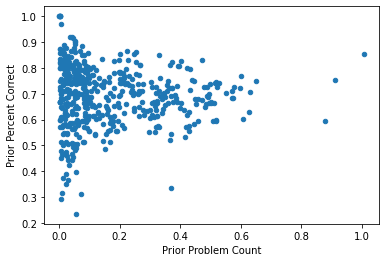

In [168]:
A_X.plot(x=feature_1, y = feature_2, kind="scatter", )

In [169]:
A_X[feature_1].describe()

count    500.000000
mean       0.160338
std        0.167611
min        0.000200
25%        0.035550
50%        0.087500
75%        0.252200
max        1.006200
Name: Prior Problem Count, dtype: float64

/usr/local/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


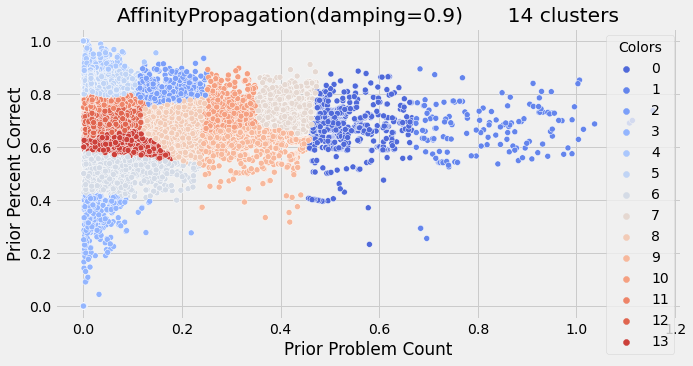

In [229]:
from sklearn import cluster
from sklearn import mixture

# KMeans models - number of clusters found from model.inertia_ 
#model = cluster.KMeans(n_clusters=5)
#model = cluster.MiniBatchKMeans(n_clusters=2)

# define the model
model = cluster.AffinityPropagation(damping=0.9)
#model = cluster.AgglomerativeClustering(n_clusters=5)
#model = cluster.Birch(threshold=0.01, n_clusters=6)
#model = cluster.DBSCAN(eps=0.30, min_samples=9)

#model = cluster.MeanShift()
#model = cluster.OPTICS(eps=0.8, min_samples=10)
#model = cluster.SpectralClustering(n_clusters=2)
#model = mixture.GaussianMixture(n_components=2) # doesn't work in the below



# # fit the model
# model.fit(A_X)
# # assign a cluster to each example
# yhat = model.predict(A_X)

# fit and predict
model.fit_predict(A_X)
# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
A_X["Colors"] = model.labels_

num_colors = len(A_X["Colors"].unique())

plt.figure(figsize=(10,5))
sns.scatterplot(
    x=feature_1, y=feature_2,
    hue="Colors",
#    palette=sns.color_palette("hls", 20),
    data=A_X,
    palette=sns.color_palette('coolwarm', n_colors=num_colors), 
    legend="full",
#    alpha=0.3
)
plt.title(f"{model.__str__()}       {num_colors} clusters")
plt.show()

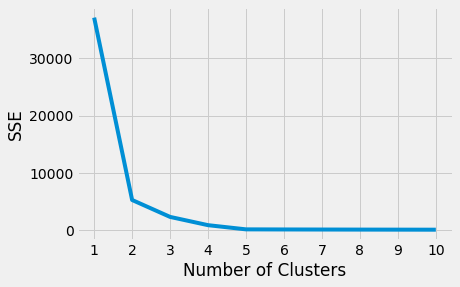

In [226]:
# A list holds the SSE (sum of squared error) values for each k
sse = []
for k in range(1, 11): 
    model = cluster.KMeans(n_clusters=k)
    #model = cluster.MiniBatchKMeans(n_clusters=k)

    model.fit(A_X)
    sse.append(model.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
model.

From Machine Learning Mastery  
https://machinelearningmastery.com/clustering-algorithms-with-python/

## Logistic Regression

Try to predict if offered video or not

In [230]:
study_data

,problem_set,problem_set_name,User ID,Condition,ExperiencedCondition,Could See Video,Prior Problem Count,Prior Correct Count,Prior Percent Correct,Class ID,...,Z-Scored Mastery Speed,Prior Homework Assigned,Prior Homework Count,Prior Homework Completion Count,Prior Homework Percent Completion,Prior Class Homework Percent Completion,Z-Scored HW Mastery Speed,complete,ProblemCount,log(count)
0,226210,Multiplying Mixed Numbers 5.NF.B.4a EX,172777,E,False,NaN,708.0,523.0,0.738701,31189,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0.477121
1,226210,Multiplying Mixed Numbers 5.NF.B.4a EX,175658,E,True,NaN,1486.0,1150.0,0.773890,30642,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0,19,NaN
2,226210,Multiplying Mixed Numbers 5.NF.B.4a EX,175669,E,True,NaN,1484.0,969.0,0.652965,29270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8,0.903090
3,226210,Multiplying Mixed Numbers 5.NF.B.4a EX,176151,E,True,NaN,1534.0,1099.0,0.716428,29270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,7,0.845098
4,226210,Multiplying Mixed Numbers 5.NF.B.4a EX,176165,E,True,NaN,1531.0,865.0,0.564990,29270,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14942,377938,Reflections 8.G.A.3 EX,332701,C,False,NaN,78.0,67.0,0.858974,35385,...,-0.436799,36.0,11.0,11.0,1.0,0.984648,-0.436799,1,3,0.477121
14943,377938,Reflections 8.G.A.3 EX,333336,C,True,NaN,94.0,76.0,0.808511,35385,...,0.192691,36.0,17.0,17.0,1.0,0.984648,0.192691,1,4,0.602060
14944,377938,Reflections 8.G.A.3 EX,333569,C,True,NaN,88.0,68.0,0.772727,35385,...,0.397174,36.0,12.0,12.0,1.0,0.984648,0.397174,1,4,0.602060
14945,377938,Reflections 8.G.A.3 EX,338608,E,True,NaN,273.0,220.0,0.805861,35385,...,-0.491379,36.0,12.0,12.0,1.0,0.984648,-0.491379,1,10,1.000000


NaN    9633
1.0    4174
0.0    1140
Name: Could See Video, dtype: int64

In [234]:
study_data["Condition"].value_counts(dropna=False)

C    7512
E    7435
Name: Condition, dtype: int64

## Random Forest Classifier

model description and some output
https://docs.google.com/document/d/1tRU-1BDFaViY6D3SscZ8quPlLD7GuLjWYcyHzl-T_S8/edit

Training a Classifier   
We trained a random forest classifier in R for each  dependent variable separately [5, 18]. We used random  forests because this machine learning algorithm has done  well for prediction in other domains with several data  mining competitions being won using random forests [7].  Each random forest was created with 1,000 trees with  default values used for the rest of the parameters. All  independent variables were included in training the model. 
We used leave-one-out cross-validation at the experiment  level for all twenty experiments. This means that we  trained on nineteen experiments and tested on the remaining  experiment, for all the experiments. This form of cross 
validation, where we train and test on different experiments,  was done so that we can train a model that will generalize  to new unseen experiments and prevent overfitting to a  single experiment. We note that there were an unbalanced  number of students in the experiments, where some  experiments had significantly more students than others.  This means that in a given fold, a small number of  experiments can have a large amount of weight for training  the model because experiments that have more data should  be weighted more than experiments with less data.  Experiments should not be equally weighted, especially if  the experiments had a very small number of students. 

The resulting model is a random forest classifier that can  take in the context/features of the student and experiment  and predict how well the students with similar context will  do on other experiments. This model ignores the  experimental conditions of the experiment since we want to  see if the effects of the conditions are different. Our data  and code can be found at [10]. 
